<a href="https://colab.research.google.com/github/khodjasCode/for_mohirdev/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
155,49,M,LOW,HIGH,10.537,drugC
15,16,F,HIGH,NORMAL,15.516,drugY
146,37,F,LOW,NORMAL,12.006,drugX
94,56,M,LOW,HIGH,15.015,drugY
37,39,M,LOW,NORMAL,13.938,drugX
82,32,F,LOW,HIGH,9.712,drugC
129,32,F,NORMAL,HIGH,7.477,drugX
61,24,M,HIGH,NORMAL,9.475,drugA
154,37,M,LOW,NORMAL,16.724,drugY
86,51,F,NORMAL,HIGH,13.597,drugX


In [4]:
df['Drug'].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [5]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
194,46,0,0,0,34.686,drugY
180,22,0,0,1,22.818,drugY
154,37,1,1,1,16.724,drugY
43,23,1,2,0,12.260,drugX
142,60,1,0,1,8.621,drugB
172,39,0,2,1,17.225,drugY
83,38,0,0,1,11.326,drugA
96,58,0,1,0,38.247,drugY
72,24,0,2,0,10.605,drugX
57,40,1,0,0,27.826,drugY


In [7]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values

In [8]:
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [11]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_predict = tree_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [17]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


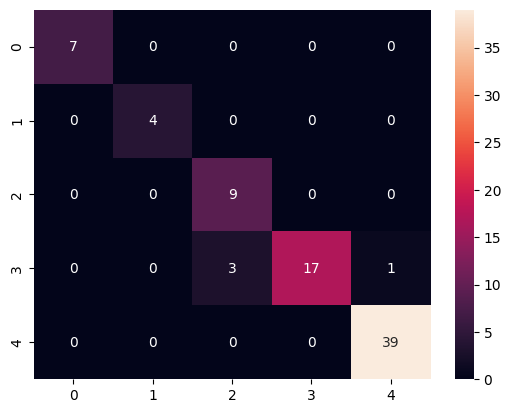

In [18]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

In [19]:
predict = cross_val_predict(estimator=tree_model, X=X, y=y, cv=5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



In [20]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

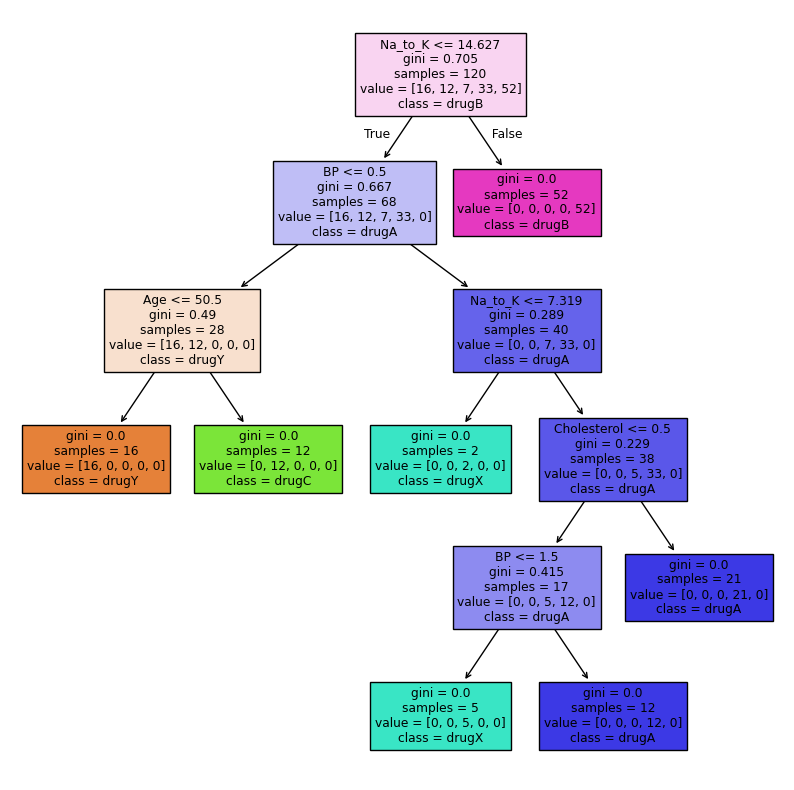

In [22]:
cols = df.drop('Drug', axis = 1).columns
classes = df['Drug'].unique()

plt.figure(figsize = (10, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled = True)
plt.show()

DecisionTrees's Accuracy:  0.95


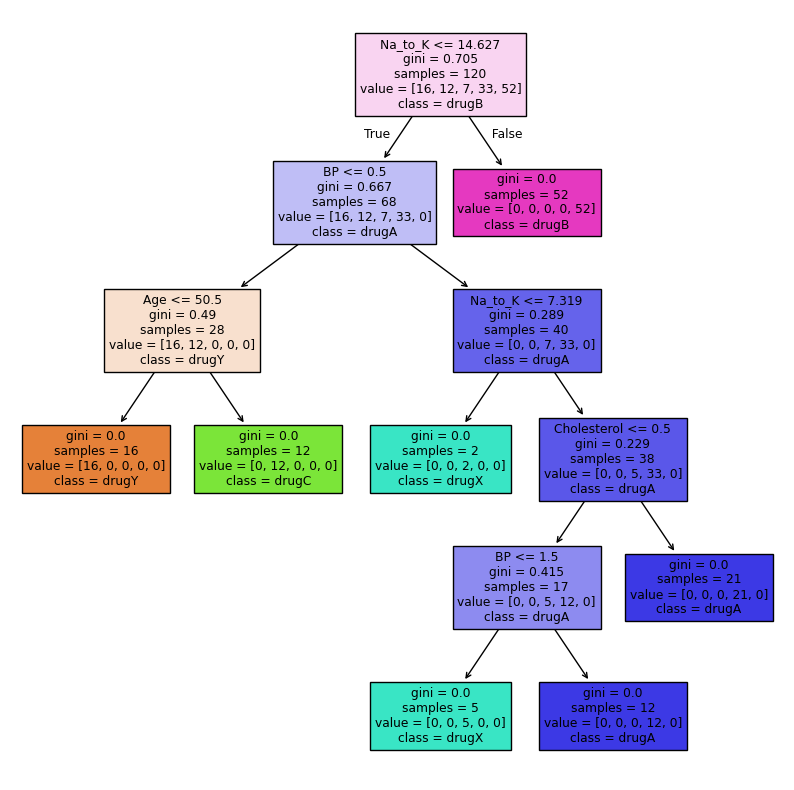

In [25]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(10,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.8375


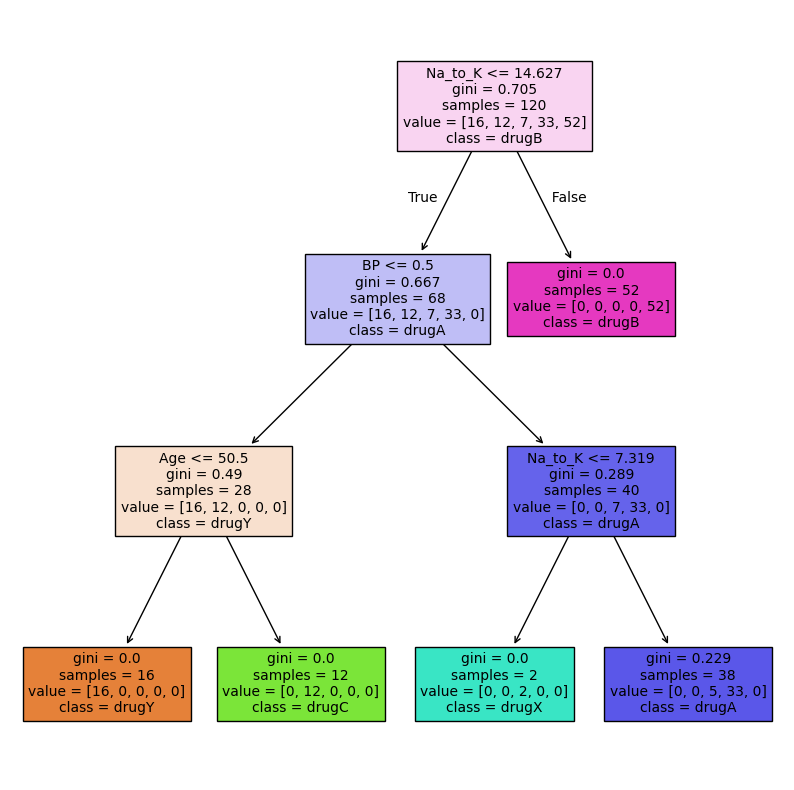

In [26]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(10, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.875


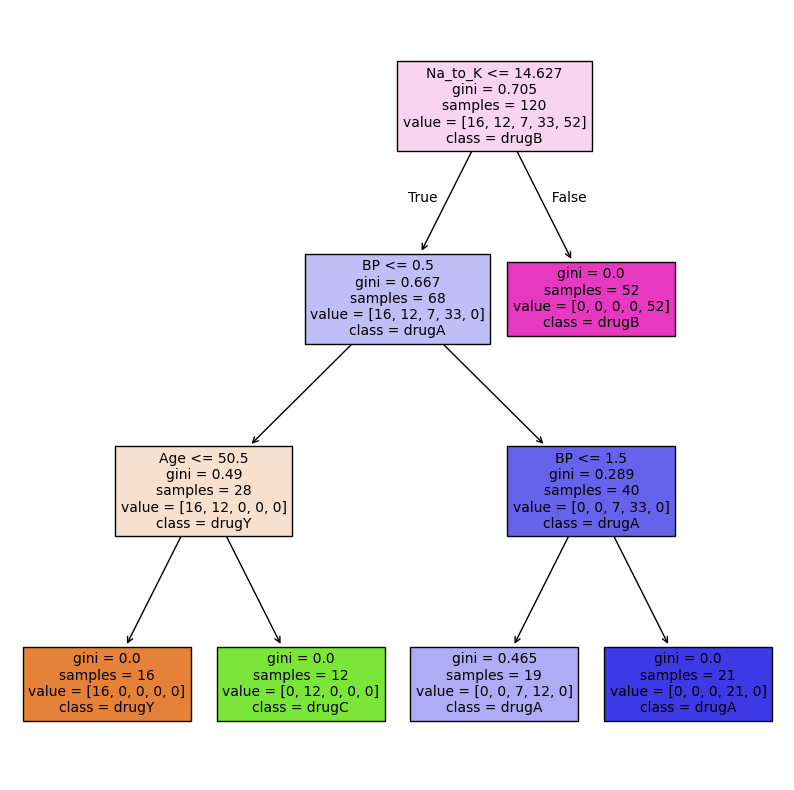

In [27]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_predict))

plt.figure(figsize=(10, 10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Random Forest

In [28]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [29]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9875
